# Project 2 - Ames Housing Data and Kaggle Challenge

# Problem Statement
Based on the Ames Housing Dataset, create a regression model that will predict the price of a house at sale.

## Content
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
    * [Missing Value](#Missing-Value)
    * [Imputing Ordinal Variable](#Imputing-Ordinal-Variable)
    * [Imputing Nominal Variable](#Imputing-Nominal-Variable)  
- [Feature Engineering/Selection](#Feature-Engineering/Selection)
    * [Distribution of target variable](#Distribution-of-target-variable)
    * [Correlation with Target Predictor](#Correlation-with-Target-Predictor)
    * [Transforming Age](#Correlation-with-Target-Predictor)
    * [Feature Selection of Correlation with Target Predictor](#Feature-Selection-of-Correlation-with-Target-Predictor)    
- [Model Fitting](#Model-Fitting)
    * [Lasso](#Lasso)
    * [with PolyNominal Feature](#with-PolyNominal-Feature)
- [Model Inference](#Model-Inference)
    * [Predicted vs True Value](#Predicted-vs-True-Value)
    * [Model](#Coefficient-of-Model)
    * [Is There a Relationship Between the Response and Predictors?](#Is-There-a-Relationship-Between-the-Response-and-Predictors?)
    * [Conclusion](#Conclusion)

## Data Dictionary

<br><details><summary> <b>Click here</b> for Data Dictionary. 
For description of the value, refer to

[Link to value description](http://jse.amstat.org/v19n3/decock/DataDocumentation.txt)</summary>

|Feature|Type|Description|
|:---:|:---:|:---|
|**ID**|*Discrete*| Observation number| 
|**PID**|*Nominal*|Parcel identification number  - can be used with city web site for parcel review|
|**MS SubClass**|*Nominal*|Identifies the type of dwelling involved in the sale|
|**MS Zoning**|*Nominal*|Identifies the general zoning classification of the sale|
|**Lot Frontage**|*Continuous*|Linear feet of street connected to property|
|**Lot Area**|*Continuous*|Lot size in square feet|
|**Street**|*Nominal*|Type of road access to property|
|**Alley**|*Nominal*|Type of alley access to property|
|**Lot Shape**|*Ordinal*| General shape of property|
|**Land Contour**|Nominal*|Flatness of the property|
|**Utilities**|*Nominal*|Type of utilities available|
|**Lot Config**|*Nominal*|Lot configuration|
|**Land Slope**|*Ordinal*|Slope of property|
|**Neighborhood**|*Nominal*|Physical locations within Ames city limits (map available)|
|**Condition 1**|*Nominal*|Proximity to various conditions|
|**Condition 2**|*Nominal*|Proximity to various conditions(if more than one is present)|
|**Bldg Type**|*Nominal*|Type of dwelling|
|**House Style**|*Nominal*|Style of dwelling|
|**Overall Qual**|*Ordinal*|Rates the overall material and finish of the house|
|**Overall Cond**|*Ordinal*|Rates the overall condition of the house|
|**Year Built**|*Discrete*|Original construction date|
|**Year Remod/Add**|*Discrete*|Remodel date (same as construction date if no remodeling or additions)|
|**Roof Style**|*Nominal*|Type of roof|
|**Roof Matl**|*Nominal*|Roof material|
|**Exterior 1**|*Nominal*|Exterior covering on house|
|**Exterior 2**|*Nominal*|Exterior covering on house(if more than one material)|
|**Mas Vnr Type**|*Nominal*|Masonry veneer type|
|**Mas Vnr Area**|*Continuous*|Masonry veneer area in square feet|
|**Exter Qual**|*Nominal*|Evaluates the quality of the material on the exterior|
|**Exter Cond**|*Ordinal*|Evaluates the present condition of the material on the exterior|
|**Foundation**|*Nominal*|Type of foundation|
|**Bsmt Qual**|*Ordinal*|Evaluates the height of the basement|
|**Bsmt Cond**|*Ordinal*|Evaluates the general condition of the basement|
|**Bsmt Exposure**|*Nominal*|Refers to walkout or garden level walls|
|**BsmtFin Type 1**|*Nominal*|Rating of basement finished area|
|**BsmtFin SF 1**|*Continuous*|Type 1 finished square feet|
|**BsmtFinType 2**|*Ordinal*|Rating of basement finished area (if multiple types)|
|**BsmtFin SF 2**|*Continuous*|Type 2 finished square feet|
|**Bsmt Unf SF**|*Nominal*|Unfinished square feet of basement area|
|**Total Bsmt SF**|*Continuous*|Total square feet of basement area|
|**Heating**|*Nominal*| Type of heating|
|**HeatingQC**|*Ordinal*|Heating quality and condition|
|**Central Air**|*Nominal*| Central air conditioning|
|**Electrical**|*Ordinal*|Electrical system|
|**1st Flr SF**|*Continuous*|First Floor square feet|
|**2nd Flr SF**|*Continuous*|Second floor square feet|
|**Low Qual Fin SF**|*Continuous*|Low quality finished square feet (all floors)|
|**Gr Liv Area**|*Continuous*|Above grade (ground) living area square feet|
|**Bsmt Full Bath**|*Ordinal*|Basement full bathrooms|
|**Bsmt Half Bath**|*Continuous*|Basement half bathrooms|
|**Full Bath**|*Discrete*|Full bathrooms above grade|
|**Half Bath**|*Discrete*|Half baths above grade|
|**Bedroom**|*Discrete*|Bedrooms above grade (does NOT include basement bedrooms)|
|**Litchen**|*Discrete*|Kitchens above grade|
|**KitchenQual**|*Ordinal*|Kitchen quality|
|**TotRmsAbvGrd**|*Discrete*|Total rooms above grade (does not include bathrooms)|
|**Functional**|*Ordinal*|Home functionality (Assume typical unless deductions are warranted)|
|**Fireplaces**|*Discrete*|Number of fireplaces)|
|**FireplaceQu**|*Ordinal*|Fireplace quality|
|**Garage**|*Nominal*|Garage location|
|**Garage Yr Blt**|*Discrete*|Year garage was built|
|**Garage Finish**|*Ordinal*|Interior finish of the garage|
|**Garage Cars**|*Discrete*|Size of garage in car capacity|
|**Garage Area**|*Continuous*|Size of garage in square feet|
|**Garage Qual**|*Ordinal*|Garage quality|
|**Garage Cond**|*Ordinal*| Garage condition|
|**Paved Drive**|*Ordinal*|Paved driveway|
|**Wood Deck SF**|*Continuous*|Wood deck area in square feet|
|**Open Porch SF**|*Continuous*|Open porch area in square feet|
|**Enclosed Porch**|*Continuous*|Enclosed porch area in square feet|
|**3-Ssn Porch**|*Continuous*|Three season porch area in square feet|
|**Screen Porch**|*Continuous*|Screen porch area in square feet|
|**Pool Area**|*Continuous*| Pool area in square feet|
|**Pool QC**|*Ordinal*|Pool quality|
|**Fence**|*Ordinal*| Fence quality|
|**Misc Feature**|*Nominal*|Miscellaneous feature not covered in other categories|
|**Misc Val**|*Continuous*|Value of miscellaneous feature|
|**Mo Sold**|*Discrete*|Month Sold (MM)|
|**Yr Sold**|*Discrete*| Year Sold (YYYY)|
|**Sale Type**|*Nominal*|Type of sale|
|**Sale Condition**|*Nominal*|Condition of sale|
|**SalePrice**|*Continuous*|Sale price|

</details>

# Data Import and Cleaning

In [184]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import re

from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import PolynomialFeatures

import math
import scipy.stats

plt.rcParams['figure.figsize'] = [15,10]
plt.rcParams['font.size'] =14
plt.rcParams['font.weight']= 'bold'
plt.style.use('seaborn-white')

pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',30)

In [185]:
housing = pd.read_csv('datasets/train.csv')

In [186]:
housing.head()

Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley  \
0  109  533352170           60        RL           NaN     13517   Pave   NaN   
1  544  531379050           60        RL          43.0     11492   Pave   NaN   
2  153  535304180           20        RL          68.0      7922   Pave   NaN   
3  318  916386060           60        RL          73.0      9802   Pave   NaN   
4  255  906425045           50        RL          82.0     14235   Pave   NaN   

  Lot Shape Land Contour Utilities Lot Config Land Slope Neighborhood  \
0       IR1          Lvl    AllPub    CulDSac        Gtl       Sawyer   
1       IR1          Lvl    AllPub    CulDSac        Gtl      SawyerW   
2       Reg          Lvl    AllPub     Inside        Gtl        NAmes   
3       Reg          Lvl    AllPub     Inside        Gtl       Timber   
4       IR1          Lvl    AllPub     Inside        Gtl      SawyerW   

  Condition 1 Condition 2 Bldg Type House Style  Overall Qual  Overall Cond  \
0        RRAe        Norm      1Fam      2Story             6             8   
1        Norm        Norm      1Fam      2Story             7             5   
2        Norm        Norm      1Fam      1Story             5             7   
3        Norm        Norm      1Fam      2Story             5             5   
4        Norm        Norm      1Fam      1.5Fin             6             8   

   Year Built  Year Remod/Add Roof Style Roof Matl Exterior 1st Exterior 2nd  \
0        1976            2005      Gable   CompShg      HdBoard      Plywood   
1        1996            1997      Gable   CompShg      VinylSd      VinylSd   
2        1953            2007      Gable   CompShg      VinylSd      VinylSd   
3        2006            2007      Gable   CompShg      VinylSd      VinylSd   
4        1900            1993      Gable   CompShg      Wd Sdng      Plywood   

  Mas Vnr Type  Mas Vnr Area Exter Qual Exter Cond Foundation Bsmt Qual  \
0      BrkFace         289.0         Gd         TA     CBlock        TA   
1      BrkFace         132.0         Gd         TA      PConc        Gd   
2         None           0.0         TA         Gd     CBlock        TA   
3         None           0.0         TA         TA      PConc        Gd   
4         None           0.0         TA         TA      PConc        Fa   

  Bsmt Cond Bsmt Exposure BsmtFin Type 1  BsmtFin SF 1 BsmtFin Type 2  \
0        TA            No            GLQ         533.0            Unf   
1        TA            No            GLQ         637.0            Unf   
2        TA            No            GLQ         731.0            Unf   
3        TA            No            Unf           0.0            Unf   
4        Gd            No            Unf           0.0            Unf   

   BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF Heating Heating QC Central Air  \
0           0.0        192.0          725.0    GasA         Ex           Y   
1           0.0        276.0          913.0    GasA         Ex           Y   
2           0.0        326.0         1057.0    GasA         TA           Y   
3           0.0        384.0          384.0    GasA         Gd           Y   
4           0.0        676.0          676.0    GasA         TA           Y   

  Electrical  1st Flr SF  2nd Flr SF  Low Qual Fin SF  Gr Liv Area  \
0      SBrkr         725         754                0         1479   
1      SBrkr         913        1209                0         2122   
2      SBrkr        1057           0                0         1057   
3      SBrkr         744         700                0         1444   
4      SBrkr         831         614                0         1445   

   Bsmt Full Bath  Bsmt Half Bath  Full Bath  Half Bath  Bedroom AbvGr  \
0             0.0             0.0          2          1              3   
1             1.0             0.0          2          1              4   
2             1.0             0.0          1          0              3   
3             0.0             0.0          2  

In [187]:
housing.shape

(2051, 81)

In [188]:
#create a copy for EDA
eda = housing.copy()

## Missing Value

In [189]:
eda.isna().mean().sort_values(ascending=False).head(25)

Pool QC           0.995612
Misc Feature      0.968308
Alley             0.931741
Fence             0.804973
Fireplace Qu      0.487567
Lot Frontage      0.160897
Garage Finish     0.055583
Garage Qual       0.055583
Garage Yr Blt     0.055583
Garage Cond       0.055583
Garage Type       0.055095
Bsmt Exposure     0.028279
BsmtFin Type 2    0.027304
BsmtFin Type 1    0.026816
Bsmt Cond         0.026816
Bsmt Qual         0.026816
Mas Vnr Area      0.010726
Mas Vnr Type      0.010726
Bsmt Half Bath    0.000975
Bsmt Full Bath    0.000975
Garage Area       0.000488
Total Bsmt SF     0.000488
Bsmt Unf SF       0.000488
BsmtFin SF 2      0.000488
BsmtFin SF 1      0.000488
dtype: float64

There is high missingness in _Pool QC, Misc Feature, Alley,Fence,Fireplace & Lot Frontage_ and some level of missingness across other feature. 

In the DataDocument, the missingness is **expected** as it indicates the absence of the feature. For example, for a house that has no Garage, the _Garage Quality_ feature will be NA. 

But how can one tell if NA is absence of the feature or a missing value?
<br>The missingness is consistence across the Main Category of a feature, eg for *Garage*, it can be seen that _Garage Qual, Garage Yr Bl, Garage Type_ missingness are consistence.
Hence these N/A shall NOT be treated as missing value.

**Action**: 

1. For _Pool QC, Misc Feature, Alley_, Although it is not a missing value, but in terms of feature variance, it is extremelty low,Hence,  we can safety drop it as low variance will not be a good predictor for our target.  


2. For Discrete Value, we will fill the N/A as 0. However for certain Discrete Value, eg Garage Yr Blt, we shall be careful as filling 0 have different intepretation (eg the garage is built recently). We shall check *Garage Yr Blt* is having high correlation with bldg *Year Built*, we can drop the *Garage Yr Blt* Column.  


3. For Numerical(Continuous Category, We will fill the N/A with 0. For Ordinal & Nominal, we need to fill a string type as OneHotEncoder will not work with mixed data type column.





### Action 1

In [190]:
#dropping low variance column & un meaningful feature ie (ID & PID)
drop = ['Pool QC', 'Misc Feature', 'Alley', 'Id','PID']
eda.drop(drop,axis=1,inplace=True)

### Action 2

In [191]:
eda.loc[eda['Garage Yr Blt'].ne(np.nan), ['Garage Yr Blt','Year Built']].corr()

Garage Yr Blt  Year Built
Garage Yr Blt       1.000000    0.825316
Year Built          0.825316    1.000000

The Garage Yr Blt is highly correlated with the building year built. Hence we can drop drop it

In [192]:
eda.drop('Garage Yr Blt',axis=1,inplace=True)

### Action 3

In [193]:
# getting continous,ordinal,discrete,nominal variable via scraping the DataDocumentation
def get_variable(type_):
    fhand = open('DataDocumentation.txt')
    all_variables = []
    for line in fhand:
        line = line.rstrip()
        variable = re.findall(f'([\w\s\W]+)[\s]+\({type_}\)',line)
        if len(variable) < 1: continue
        all_variables.append(variable[0])
    return all_variables

In [194]:
continuous_variable = get_variable('Continuous')
print(len(set(continuous_variable)))

20


In [195]:
ordinal_variable = get_variable('Ordinal')
print(len(set(ordinal_variable)))

23


In [196]:
discrete_variable = get_variable('Discrete')
print(len(set(discrete_variable)))

15


In [197]:
nominal_variable = get_variable('Nominal')
print(len(set(nominal_variable)))

24


In [198]:
#removing the column that has been dropped
removed = ['Pool QC', 'Misc Feature', 'Alley','Garage Yr Blt', 'Id','PID']

def remove_column(removed):
    for column in removed:
        try:
            continuous_variable.remove(column)
        except:
            try:
                ordinal_variable.remove(column)
            except:
                try:
                    discrete_variable.remove(column)
                except:
                    try:
                        nominal_variable.remove(column)
                    except:
                        continue
    return None

In [199]:
remove_column(removed)

In [200]:
#checking if we have all the columns in variables matching with column in dataframe
all_columns = continuous_variable + ordinal_variable + discrete_variable + nominal_variable
checking = [column in eda.columns for column in all_columns]
all(checking)

False

In [201]:
#it seemed that there is a mismatch between variable name in databook and in the dataframe column
checking = [(x ,y ) for x , y in zip(sorted(all_columns),sorted(eda.columns)) if x != y]
checking

[('3-Ssn Porch', '3Ssn Porch'),
 ('Bedroom', 'Bedroom AbvGr'),
 ('BsmtFinType 2', 'BsmtFin Type 2'),
 ('Exterior 1', 'Exterior 1st'),
 ('Exterior 2', 'Exterior 2nd'),
 ('FireplaceQu', 'Fireplace Qu'),
 ('HeatingQC', 'Heating QC'),
 ('Kitchen', 'Kitchen AbvGr'),
 ('KitchenQual', 'Kitchen Qual'),
 ('Order', 'Overall Cond'),
 ('Overall Cond', 'Overall Qual'),
 ('Overall Qual', 'Paved Drive'),
 ('Paved Drive', 'Pool Area'),
 ('Pool Area', 'Roof Matl'),
 ('Roof Matl', 'Roof Style'),
 ('Roof Style', 'Sale Type'),
 ('Sale Condition', 'SalePrice'),
 ('Sale Type', 'Screen Porch'),
 ('SalePrice', 'Street'),
 ('Screen Porch', 'TotRms AbvGrd'),
 ('Street', 'Total Bsmt SF'),
 ('TotRmsAbvGrd', 'Utilities'),
 ('Total Bsmt SF', 'Wood Deck SF'),
 ('Utilities', 'Year Built'),
 ('Wood Deck SF', 'Year Remod/Add'),
 ('Year Built', 'Yr Sold')]

In [202]:
#Fixing column name in variable to match dataframe column.
discrete_variable = [sub.replace('Bedroom','Bedroom AbvGr').replace('Kitchen', 'Kitchen AbvGr')\
                     .replace('TotRmsAbvGrd', 'TotRms AbvGrd')          
                     for sub in discrete_variable]

ordinal_variable = [sub.replace('BsmtFinType 2','BsmtFin Type 2').replace('FireplaceQu','Fireplace Qu')\
                    .replace('HeatingQC','Heating QC').replace('KitchenQual', 'Kitchen Qual')
                    for sub in ordinal_variable]

nominal_variable = [sub.replace('Exterior 1','Exterior 1st').replace('Exterior 2','Exterior 2nd')
                    for sub in nominal_variable]

continuous_variable = [sub.replace('3-Ssn Porch', '3Ssn Porch') for sub in continuous_variable]

In [203]:
#Sales Condition & Order is not in Dataset table
nominal_variable.remove('Sale Condition')
discrete_variable.remove("Order")

In [204]:
#check again if we have fixed all the column name
all_columns = continuous_variable + ordinal_variable + discrete_variable + nominal_variable
checking = [column in eda.columns for column in all_columns]
all(checking)

True

In [205]:
#imputer for continuous_variable, discrete_variable
numerical_imp = SimpleImputer(strategy = 'constant', fill_value = 0.0)

#imputer for nominal, ordinal_variable
categorical_imp = SimpleImputer(strategy = 'constant', fill_value = 'NA')

In [206]:
ct_imp = make_column_transformer(
    (categorical_imp, nominal_variable + ordinal_variable),
    (numerical_imp, continuous_variable + discrete_variable),
    remainder = 'passthrough'
)

eda_imputed = ct_imp.fit_transform(eda);

In [207]:
features = []

#retrieving the feature name as the order is rearrange after column transformers
for feature in ct_imp.transformers_:
    features.extend(feature[2])
    
eda2 = pd.DataFrame(eda_imputed,columns=features)
eda2.head()

MS SubClass MS Zoning Street Land Contour Lot Config Neighborhood  \
0          60        RL   Pave          Lvl    CulDSac       Sawyer   
1          60        RL   Pave          Lvl    CulDSac      SawyerW   
2          20        RL   Pave          Lvl     Inside        NAmes   
3          60        RL   Pave          Lvl     Inside       Timber   
4          50        RL   Pave          Lvl     Inside      SawyerW   

  Condition 1 Condition 2 Bldg Type House Style Roof Style Roof Matl  \
0        RRAe        Norm      1Fam      2Story      Gable   CompShg   
1        Norm        Norm      1Fam      2Story      Gable   CompShg   
2        Norm        Norm      1Fam      1Story      Gable   CompShg   
3        Norm        Norm      1Fam      2Story      Gable   CompShg   
4        Norm        Norm      1Fam      1.5Fin      Gable   CompShg   

  Exterior 1st Exterior 2nd Mas Vnr Type Foundation Heating Central Air  \
0      HdBoard      Plywood      BrkFace     CBlock    GasA           Y   
1      VinylSd      VinylSd      BrkFace      PConc    GasA           Y   
2      VinylSd      VinylSd         None     CBlock    GasA           Y   
3      VinylSd      VinylSd         None      PConc    GasA           Y   
4      Wd Sdng      Plywood         None      PConc    GasA           Y   

  Garage Type Sale Type Lot Shape Utilities Land Slope Overall Qual  \
0      Attchd       WD        IR1    AllPub        Gtl            6   
1      Attchd       WD        IR1    AllPub        Gtl            7   
2      Detchd       WD        Reg    AllPub        Gtl            5   
3     BuiltIn       WD        Reg    AllPub        Gtl            5   
4      Detchd       WD        IR1    AllPub        Gtl            6   

  Overall Cond Exter Qual Exter Cond Bsmt Qual Bsmt Cond Bsmt Exposure  \
0            8         Gd         TA        TA        TA            No   
1            5         Gd         TA        Gd        TA            No   
2            7         TA         Gd        TA        TA            No   
3            5         TA         TA        Gd        TA            No   
4            8         TA         TA        Fa        Gd            No   

  BsmtFin Type 1 BsmtFin Type 2 Heating QC Electrical Kitchen Qual Functional  \
0            GLQ            Unf         Ex      SBrkr           Gd        Typ   
1            GLQ            Unf         Ex      SBrkr           Gd        Typ   
2            GLQ            Unf         TA      SBrkr           Gd        Typ   
3            Unf            Unf         Gd      SBrkr           TA        Typ   
4            Unf            Unf         TA      SBrkr           TA        Typ   

  Fireplace Qu Garage Finish Garage Qual Garage Cond Paved Drive Fence  \
0           NA           RFn          TA          TA           Y    NA   
1           TA           RFn          TA          TA           Y    NA   
2           NA           Unf          TA          TA           Y    NA   
3           NA           Fin          TA          TA           Y    NA   
4           NA           Unf          TA          TA           N    NA   

  Lot Frontage Lot Area Mas Vnr Area BsmtFin SF 1 BsmtFin SF 2 Bsmt Unf SF  \
0          0.0  13517.0        289.0        533.0          0.0       192.0   
1         43.0  11492.0        132.0        637.0          0.0       276.0   
2         68.0   7922.0          0.0        731.0          0.0       326.0   
3         73.0   9802.0          0.0          0.0          0.0       384.0   
4         82.0  14235.0          0.0          0.0          0.0       676.0   

  Total Bsmt SF 1st Flr SF 2nd Flr SF Low Qual Fin SF Gr Liv Area Garage Area  \
0         725.0      725.0      754.0             0.0      1479.0       475.0   
1         913.0      913.0     1209.0             0.0      2122.0       559.0   
2        1057.0     1057.0        0.0             0.0      1057.0       246.0   
3         384.0      744.0      700.0             0.0      1444.0       400.0   
4         676

In [208]:
#converting frame back to original dtypes
eda2 = eda2.astype(eda[features].dtypes, copy=False)
eda2.dtypes

MS SubClass        int64
MS Zoning         object
Street            object
Land Contour      object
Lot Config        object
                  ...   
TotRms AbvGrd      int64
Fireplaces         int64
Garage Cars      float64
Mo Sold            int64
Yr Sold            int64
Length: 75, dtype: object

In [209]:
#checking if all columns contain any missing value
sum(eda2.isna().sum())

0

## Imputing Ordinal Variable

Normally we will perform OrdinalEncoder (and also OneHotEncoder) on Train set only to avoid data leakage. However, in this dataset it is assumed that all ordinal category variables are listed as per the documentation and therefore there will not be any future unseen value.

In [210]:
#Order of the values in Ordinal Encoding matters, hence this have to be done manually. 
#Next time, it is better to store in the database such that ordinal category shall be in numerical

ordinal_list = [
    ['IR3', 'IR2', 'IR1', 'Reg'], # Lot Shape
    ['ELO', 'NoSeWa', 'NoSewr', 'AllPub' ], # 'Utilities'
    ['Sev', 'Mod', 'Gtl'], # Land Slope
    [1,2,3,4,5,6,7,8,9,10], # Overall Qual
    [1,2,3,4,5,6,7,8,9,10], # Overall Cond
    ['Po', 'Fa', 'TA', 'Gd', 'Ex'], # Exter Qual
    ['Po', 'Fa', 'TA', 'Gd', 'Ex'], # Exter Cond
    ['NA' , 'Po', 'Fa', 'TA', 'Gd', 'Ex'], # Bsmt Qual
    ['NA' , 'Po', 'Fa', 'TA', 'Gd', 'Ex'], # Bsmt Cond
    ['NA', 'No', 'Mn', 'Av', 'Gd'], # Bsmt Exposure
    ['NA',  'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'], # BsmtFin Type 1
    ['NA',  'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'], # BsmtFin Type 2 
    ['Po', 'Fa', 'TA', 'Gd', 'Ex', ], # 'Heating QC
    ['Mix', 'FuseP', 'FuseF', 'FuseA', 'SBrkr', ], # 'Electrical
    ['Po', 'Fa', 'TA', 'Gd', 'Ex'], # Kitchen Qual
    ['Sal', 'Sev', 'Maj2', 'Maj1', 'Mod', 'Min2', 'Min1', 'Typ'], # Functional
    ['NA' , 'Po', 'Fa', 'TA', 'Gd', 'Ex'], # Fireplace Qu
    ['NA', 'Unf', 'RFn', 'Fin'], # Garage Finish
    ['NA' , 'Po', 'Fa', 'TA', 'Gd', 'Ex'], # Garage Qual
    ['NA' , 'Po', 'Fa', 'TA', 'Gd', 'Ex'], # Garage Cond
    ['N', 'P', 'Y'], # Paved Drive
    ['NA', 'MnWw', 'GdWo', 'MnPrv', 'GdPrv'] # Fence
]

In [211]:
ord_enc = OrdinalEncoder(categories=ordinal_list, handle_unknown='error')

In [212]:
eda_encoded = ord_enc.fit_transform(eda2[ordinal_variable])

In [213]:
eda3 = eda2.copy()
eda3[ordinal_variable] = eda_encoded
eda3.head(5)

MS SubClass MS Zoning Street Land Contour Lot Config Neighborhood  \
0           60        RL   Pave          Lvl    CulDSac       Sawyer   
1           60        RL   Pave          Lvl    CulDSac      SawyerW   
2           20        RL   Pave          Lvl     Inside        NAmes   
3           60        RL   Pave          Lvl     Inside       Timber   
4           50        RL   Pave          Lvl     Inside      SawyerW   

  Condition 1 Condition 2 Bldg Type House Style Roof Style Roof Matl  \
0        RRAe        Norm      1Fam      2Story      Gable   CompShg   
1        Norm        Norm      1Fam      2Story      Gable   CompShg   
2        Norm        Norm      1Fam      1Story      Gable   CompShg   
3        Norm        Norm      1Fam      2Story      Gable   CompShg   
4        Norm        Norm      1Fam      1.5Fin      Gable   CompShg   

  Exterior 1st Exterior 2nd Mas Vnr Type Foundation Heating Central Air  \
0      HdBoard      Plywood      BrkFace     CBlock    GasA           Y   
1      VinylSd      VinylSd      BrkFace      PConc    GasA           Y   
2      VinylSd      VinylSd         None     CBlock    GasA           Y   
3      VinylSd      VinylSd         None      PConc    GasA           Y   
4      Wd Sdng      Plywood         None      PConc    GasA           Y   

  Garage Type Sale Type  Lot Shape  Utilities  Land Slope  Overall Qual  \
0      Attchd       WD         2.0        3.0         2.0           5.0   
1      Attchd       WD         2.0        3.0         2.0           6.0   
2      Detchd       WD         3.0        3.0         2.0           4.0   
3     BuiltIn       WD         3.0        3.0         2.0           4.0   
4      Detchd       WD         2.0        3.0         2.0           5.0   

   Overall Cond  Exter Qual  Exter Cond  Bsmt Qual  Bsmt Cond  Bsmt Exposure  \
0           7.0         3.0         2.0        3.0        3.0            1.0   
1           4.0         3.0         2.0        4.0        3.0            1.0   
2           6.0         2.0         3.0        3.0        3.0            1.0   
3           4.0         2.0         2.0        4.0        3.0            1.0   
4           7.0         2.0         2.0        2.0        4.0            1.0   

   BsmtFin Type 1  BsmtFin Type 2  Heating QC  Electrical  Kitchen Qual  \
0             6.0             1.0         4.0         4.0           3.0   
1             6.0             1.0         4.0         4.0           3.0   
2             6.0             1.0         2.0         4.0           3.0   
3             1.0             1.0         3.0         4.0           2.0   
4             1.0             1.0         2.0         4.0           2.0   

   Functional  Fireplace Qu  Garage Finish  Garage Qual  Garage Cond  \
0         7.0           0.0            2.0          3.0          3.0   
1         7.0           3.0            2.0          3.0          3.0   
2         7.0           0.0            1.0          3.0          3.0   
3         7.0           0.0            3.0          3.0          3.0   
4         7.0           0.0            1.0          3.0          3.0   

   Paved Drive  Fence  Lot Frontage  Lot Area  Mas Vnr Area  BsmtFin SF 1  \
0          2.0    0.0           0.0     13517         289.0         533.0   
1          2.0    0.0          43.0     11492         132.0         637.0   
2          2.0    0.0          68.0      7922           0.0         731.0   
3          2.0    0.0          73.0      9802           0.0           0.0   
4          0.0    0.0          82.0     14235           0.0           0.0   

   BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF  1st Flr SF  2nd Flr SF  \
0           0.0        192.0          725.0         725         754   
1           0.0        276.0          913.0         913        1209   
2           0.0        326.0         1057.0        1057           0   
3           0.0        384.0          384.0         744         700   
4           0.0        676.0          676.0         

In [214]:
#test to ensure the transformation is as intended.

def test_ord_encoder(before,after):
    
    #counter for the distribution of unique value, before and after must be the same
    def counter(df , column):
        counter = dict()
        for ele in df[column]:
            counter[ele] = counter.get(ele,0) + 1
        return list(counter.values())
     
    assert before.shape == after.shape
    
    for before_col, after_col in zip(before.columns, after.columns):

        assert counter(before, before_col) == counter(after, after_col)
        
    print('No issue')

In [215]:
test_ord_encoder(eda2, eda3)

No issue


## Imputing Nominal Variable

via OneHotEncoded

In [216]:
#train test split to avoid dataleakage
continuous_variable.remove('SalePrice')
X = eda3.drop('SalePrice', axis = 1)
y = eda3['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 0)

In [217]:
ohe_enc = OneHotEncoder(handle_unknown='ignore')

In [218]:
ct = make_column_transformer(
    (ohe_enc, nominal_variable),
    remainder = 'passthrough'
)

In [219]:
X_train_transform = ct.fit_transform(X_train)

In [220]:
ohe_feature = ct.named_transformers_.onehotencoder.get_feature_names(nominal_variable).tolist()

In [221]:
#returning indices of passthrough column
indices = ct.transformers_[-1][-1]
#feature name of passthrough column
passthrough_feature = [X_train.columns[index] for index in indices]

X_train_transform = pd.DataFrame(X_train_transform, columns = ohe_feature + passthrough_feature)
X_train_transform.head()

MS SubClass_20  MS SubClass_30  MS SubClass_40  MS SubClass_45  \
0             0.0             0.0             0.0             0.0   
1             0.0             0.0             0.0             0.0   
2             1.0             0.0             0.0             0.0   
3             1.0             0.0             0.0             0.0   
4             0.0             0.0             0.0             0.0   

   MS SubClass_50  MS SubClass_60  MS SubClass_70  MS SubClass_75  \
0             0.0             0.0             0.0             0.0   
1             0.0             1.0             0.0             0.0   
2             0.0             0.0             0.0             0.0   
3             0.0             0.0             0.0             0.0   
4             0.0             1.0             0.0             0.0   

   MS SubClass_80  MS SubClass_85  MS SubClass_90  MS SubClass_120  \
0             0.0             0.0             0.0              1.0   
1             0.0             0.0             0.0              0.0   
2             0.0             0.0             0.0              0.0   
3             0.0             0.0             0.0              0.0   
4             0.0             0.0             0.0              0.0   

   MS SubClass_150  MS SubClass_160  MS SubClass_180  MS SubClass_190  \
0              0.0              0.0              0.0              0.0   
1              0.0              0.0              0.0              0.0   
2              0.0              0.0              0.0              0.0   
3              0.0              0.0              0.0              0.0   
4              0.0              0.0              0.0              0.0   

   MS Zoning_A (agr)  MS Zoning_C (all)  MS Zoning_FV  MS Zoning_I (all)  \
0                0.0                0.0           0.0                0.0   
1                0.0                0.0           0.0                0.0   
2                0.0                0.0           0.0                0.0   
3                0.0                0.0           0.0                0.0   
4                0.0                0.0           0.0                0.0   

   MS Zoning_RH  MS Zoning_RL  MS Zoning_RM  Street_Grvl  Street_Pave  \
0           0.0           0.0           1.0          0.0          1.0   
1           0.0           1.0           0.0          0.0          1.0   
2           0.0           1.0           0.0          0.0          1.0   
3           0.0           1.0           0.0          0.0          1.0   
4           0.0           1.0           0.0          0.0          1.0   

   Land Contour_Bnk  Land Contour_HLS  Land Contour_Low  Land Contour_Lvl  \
0               0.0               0.0               0.0               1.0   
1               0.0               0.0               0.0               1.0   
2               0.0               0.0               0.0               1.0   
3               0.0               0.0               0.0               1.0   
4               0.0               0.0               0.0               1.0   

   Lot Config_Corner  Lot Config_CulDSac  Lot Config_FR2  Lot Config_FR3  \
0                0.0                 0.0             0.0             0.0   
1                1.0                 0.0             0.0             0.0   
2                1.0                 0.0             0.0             0.0   
3                0.0                 0.0             0.0             0.0   
4                1.0                 0.0             0.0             0.0   

   Lot Config_Inside  Neighborhood_Blmngtn  Neighborhood_Blueste  \
0                1.0                   0.0                   0.0   
1                0.0                   0.0                   0.0   
2                0.0                   0.0                   0.0   
3                1.0                   0.0                   0.0   
4                0.0                   0.0                   0.0   

   Neighborhood_BrDale  Neighborhood_BrkSide  Neighborhood_ClearCr  \
0                 

In [222]:
X_train_transform.shape

(1640, 219)

In [223]:
X_test_transform = ct.transform(X_test)
X_test_transform.shape

(411, 219)

In [224]:
#repeat for X_test
ohe_feature = ct.named_transformers_.onehotencoder.get_feature_names(nominal_variable).tolist()


indices = ct.transformers_[-1][-1]

passthrough_feature = [X_test.columns[index] for index in indices]

X_test_transform = pd.DataFrame(X_test_transform, columns = ohe_feature + passthrough_feature)
X_test_transform.head()

MS SubClass_20  MS SubClass_30  MS SubClass_40  MS SubClass_45  \
0             0.0             0.0             0.0             0.0   
1             0.0             0.0             0.0             0.0   
2             1.0             0.0             0.0             0.0   
3             0.0             0.0             0.0             0.0   
4             0.0             0.0             0.0             0.0   

   MS SubClass_50  MS SubClass_60  MS SubClass_70  MS SubClass_75  \
0             0.0             1.0             0.0             0.0   
1             0.0             1.0             0.0             0.0   
2             0.0             0.0             0.0             0.0   
3             1.0             0.0             0.0             0.0   
4             0.0             0.0             0.0             0.0   

   MS SubClass_80  MS SubClass_85  MS SubClass_90  MS SubClass_120  \
0             0.0             0.0             0.0              0.0   
1             0.0             0.0             0.0              0.0   
2             0.0             0.0             0.0              0.0   
3             0.0             0.0             0.0              0.0   
4             0.0             0.0             0.0              0.0   

   MS SubClass_150  MS SubClass_160  MS SubClass_180  MS SubClass_190  \
0              0.0              0.0              0.0              0.0   
1              0.0              0.0              0.0              0.0   
2              0.0              0.0              0.0              0.0   
3              0.0              0.0              0.0              0.0   
4              0.0              1.0              0.0              0.0   

   MS Zoning_A (agr)  MS Zoning_C (all)  MS Zoning_FV  MS Zoning_I (all)  \
0                0.0                0.0           0.0                0.0   
1                0.0                0.0           0.0                0.0   
2                0.0                0.0           1.0                0.0   
3                0.0                0.0           0.0                0.0   
4                0.0                0.0           0.0                0.0   

   MS Zoning_RH  MS Zoning_RL  MS Zoning_RM  Street_Grvl  Street_Pave  \
0           0.0           1.0           0.0          0.0          1.0   
1           0.0           1.0           0.0          0.0          1.0   
2           0.0           0.0           0.0          0.0          1.0   
3           0.0           1.0           0.0          0.0          1.0   
4           0.0           0.0           1.0          0.0          1.0   

   Land Contour_Bnk  Land Contour_HLS  Land Contour_Low  Land Contour_Lvl  \
0               0.0               0.0               0.0               1.0   
1               0.0               1.0               0.0               0.0   
2               0.0               0.0               0.0               1.0   
3               0.0               0.0               0.0               1.0   
4               0.0               0.0               0.0               1.0   

   Lot Config_Corner  Lot Config_CulDSac  Lot Config_FR2  Lot Config_FR3  \
0                0.0                 0.0             0.0             0.0   
1                1.0                 0.0             0.0             0.0   
2                0.0                 0.0             0.0             0.0   
3                0.0                 0.0             0.0             0.0   
4                0.0                 0.0             0.0             0.0   

   Lot Config_Inside  Neighborhood_Blmngtn  Neighborhood_Blueste  \
0                1.0                   0.0                   0.0   
1                0.0                   0.0                   0.0   
2                1.0                   0.0                   0.0   
3                1.0                   0.0                   0.0   
4                1.0                   0.0                   0.0   

   Neighborhood_BrDale  Neighborhood_BrkSide  Neighborhood_ClearCr  \
0                 

In [225]:
X_test_transform.shape

(411, 219)

### Section Summary

We have done the following:-

1. Dropped _Pool QC, Misc Feature, Alley as it has low variance
2. Drooped _Garage Yr Blt_ as it is highly collerate with _Year Built_
3. Imputed 'NA' for Categorical Variable and 0 for Numerical Variable.
4. OrdinalEncoded for Ordinal Variable
5. OneHotEncoded for X_train set

# Feature Engineering/Selection

## Distribution of target variable

In [226]:
numerical_variable = continuous_variable + ordinal_variable + discrete_variable
nominal_variable = X_train_transform.drop(numerical_variable, axis=1).columns.to_list()

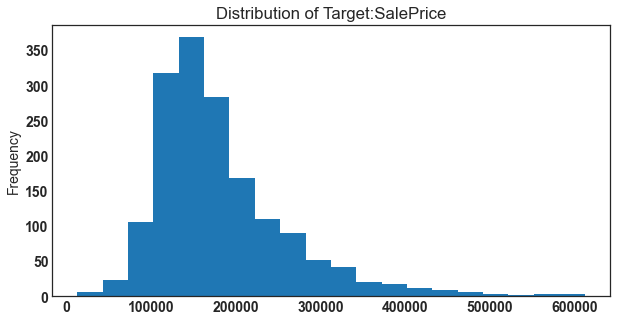

In [227]:
plt.figure(figsize=(10,5))
y_train.plot(kind='hist',bins=20)
plt.title('Distribution of Target:SalePrice');

The target Variable is having positive skewness. We will need to transform it to normal distribution to be able to use Linear Regression.
<br>From below chart square root transformation is seen to have better shape approximate to normal distribution

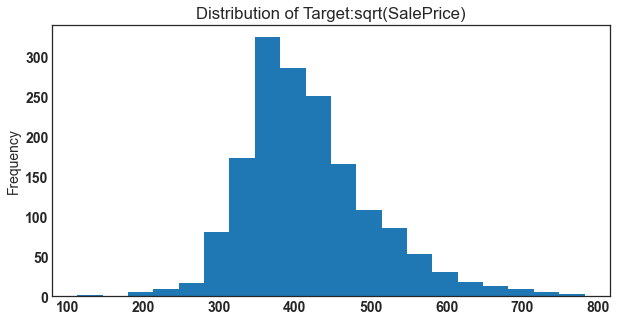

In [228]:
plt.figure(figsize=(10,5))
np.sqrt(y_train).plot(kind='hist',bins=20)
plt.title('Distribution of Target:sqrt(SalePrice)');

## Distribution of Continuous Variable

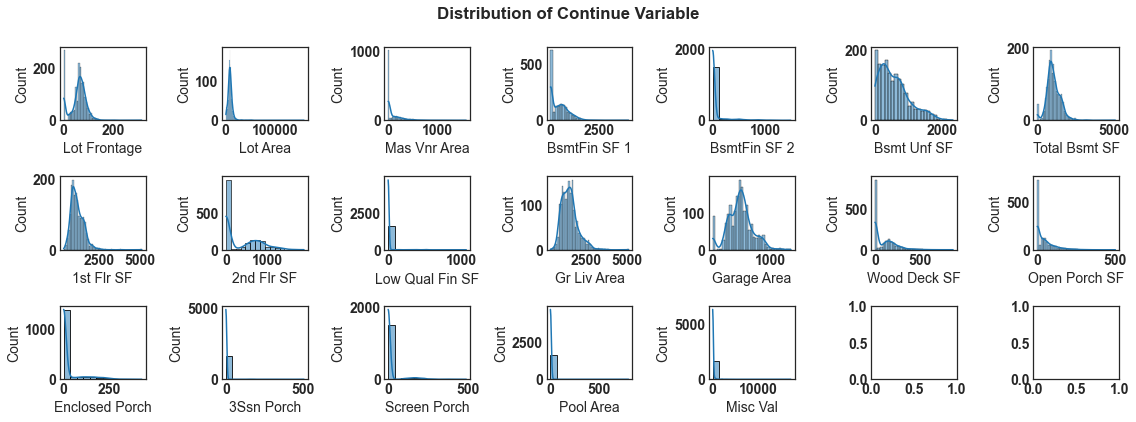

In [229]:
rows = 3
cols = 7

fig, ax = plt.subplots(nrows = rows, ncols = cols, figsize=(16,6))

index = 0

for row in range(rows):
    for col in range(cols):
        try:
            sns.histplot(X_train_transform[continuous_variable[index]], ax = ax[row][col], kde=True)
            index += 1
        except:
            continue

fig.suptitle('Distribution of Continue Variable',fontweight = 'bold')
plt.tight_layout();

We can see that **_Garage Area, Gr Liv Area, Total BSMF, 1st Flr SF_** is close to **normal distribution**, which will have higher correlation with target variable **Sale Price** and can be a good predictor. We shall investigate on correlation to confirm this. However intuition says that Mo Sold does not really matters with price. We will investigate below to further confirm

## Distribution of Discrete Variable

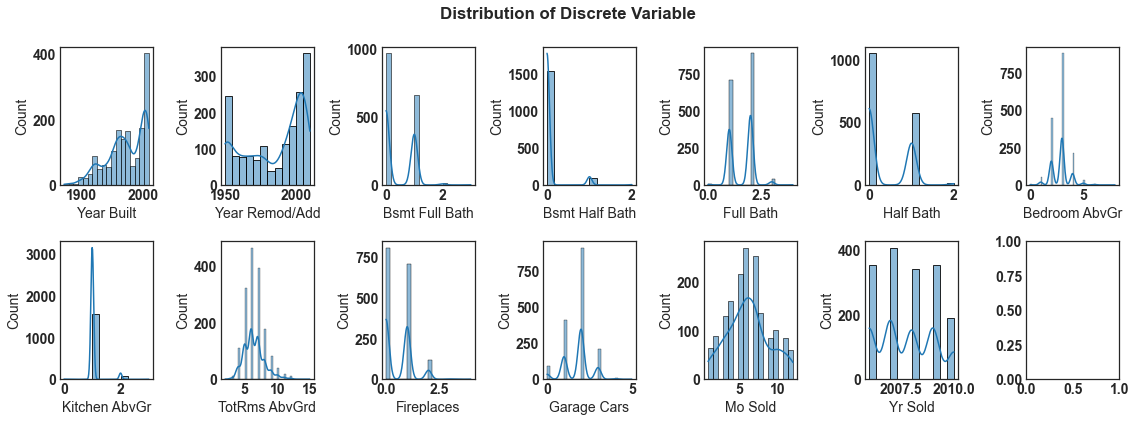

In [230]:
rows = 2
cols = 7

fig, ax = plt.subplots(nrows = rows, ncols = cols, figsize=(16,6))

index = 0

for row in range(rows):
    for col in range(cols):
        try:
            sns.histplot(X_train_transform[discrete_variable[index]], ax = ax[row][col], kde=True)
            index += 1
        except:
            continue

fig.suptitle('Distribution of Discrete Variable',fontweight = 'bold')
plt.tight_layout();

We can see that **_Year Built, TotRms Abv Grd & Mo Sold_** have close to normal distribution which will have higher correlation with target variable **Sale Price** and can be a good predictor. We shall investigate on correlation to confirm this. However intuition says that _Mo Sold_ does not really have a meaningful relationship with price.

## Distribution of Ordinal Variable

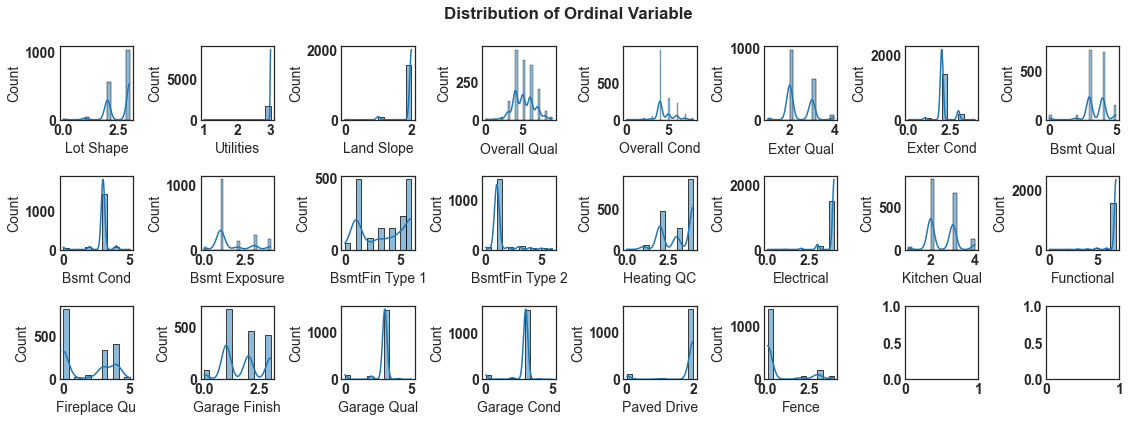

In [231]:
rows = 3
cols = 8

fig, ax = plt.subplots(nrows = rows, ncols = cols, figsize=(16,6))

index = 0

for row in range(rows):
    for col in range(cols):
        try:
            sns.histplot(X_train_transform[ordinal_variable[index]], ax = ax[row][col], kde=True)
            index += 1
        except:
            continue

fig.suptitle('Distribution of Ordinal Variable',fontweight = 'bold')
plt.tight_layout();

We can see that **_Overall Qual, Exter Cond_** have close to normal distribution. which will have higher correlation with target variable **Sale Price** and can be a good predictor. We shall investigate on correlation to confirm this. However intuition says that Mo Sold does not really have a meaningful relationship with price.

## Correlation with Target Predictor

In [232]:
temporary_df = X_train_transform[numerical_variable].copy()
temporary_df['SalePrice'] = np.sqrt(y_train).values
correlation_with_y = temporary_df.corr()['SalePrice'].sort_values(ascending=False, key= lambda x: abs(x))
correlation_with_y

SalePrice         1.000000
Overall Qual      0.822840
Exter Qual        0.710224
Gr Liv Area       0.706183
Kitchen Qual      0.698949
                    ...   
Pool Area         0.032510
BsmtFin SF 2      0.028190
BsmtFin Type 2    0.025856
Yr Sold          -0.019081
Misc Val         -0.007542
Name: SalePrice, Length: 55, dtype: float64

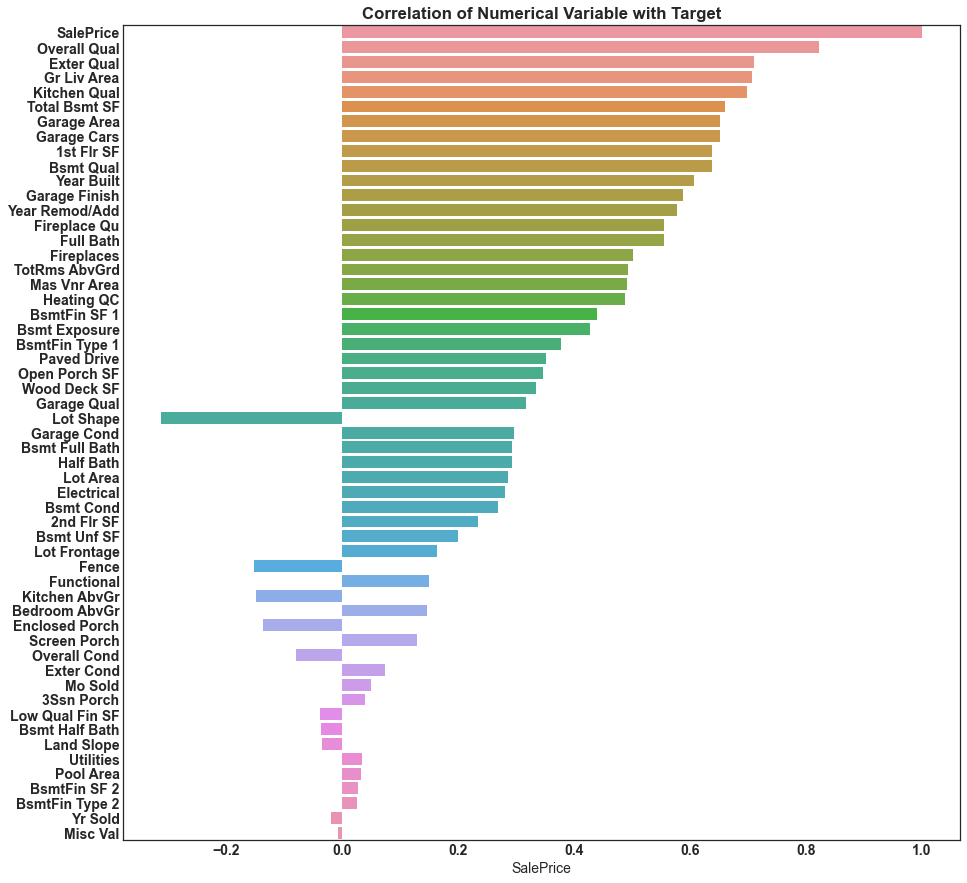

In [233]:
plt.figure(figsize=(15,15))
sns.barplot(y=correlation_with_y.index, x=correlation_with_y)
plt.title('Correlation of Numerical Variable with Target', fontweight='bold');

It is seen that overall top 10 of the features is having positive correlation with the target, while some of the feature is having negative correlation. However, interesting the negative correlation is unexpected for _Kitchen AbvGr, Bedroom AbvGr, Overall Cond_, especially overall Cond,it may be due to randomness that lead to this slight negative correlation

## Transforming Age

Lets change the column into Age when sold to see if it has higher correlation.

In [234]:
temporary_df['Age_Sold'] = X_train_transform['Yr Sold'] - X_train_transform['Year Built'] 

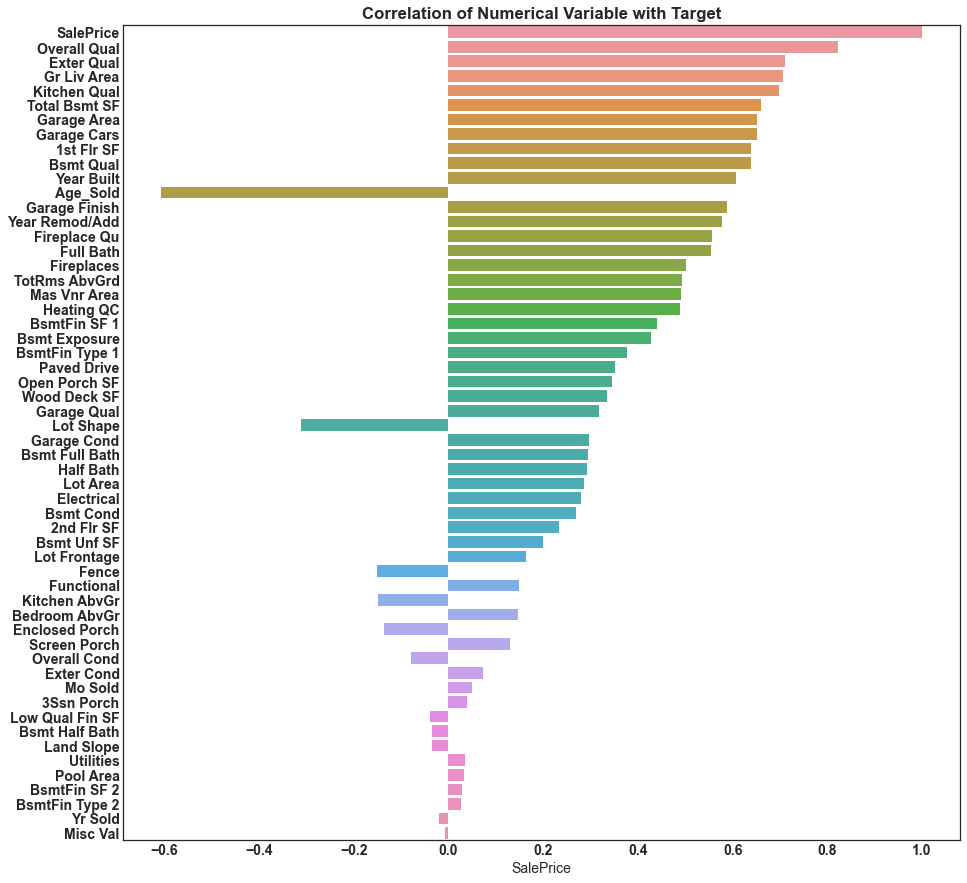

In [235]:
correlation_with_y = temporary_df.corr()['SalePrice'].sort_values(ascending=False, key= lambda x: abs(x))

plt.figure(figsize=(15,15))
sns.barplot(y=correlation_with_y.index, x=correlation_with_y)
plt.title('Correlation of Numerical Variable with Target', fontweight='bold');

It seemed that the age_sold transformation did not have a better result. It is almost same as year-Built. However for better inference model. we will keep the transformation. It is not neccessary to write a cusmtom class, however it can smoothen pipeline building process, and if required, class method enable us to study the _partial effect of age_ to the model accuracy easier via GridSearchCV.

In [236]:
class AgeSold(BaseEstimator, TransformerMixin):
    
    def __init__(self, age = True):
        self.age = age
    
    @property
    def getFeature(self):
        return self.feature

    @property
    def getIndex(self):
        return self.index
    
    def fit(self, X, y=None):      
        return self #nothing to do here


    def transform(self, X, y=None):

        if self.age == True:
            temporary_df = X.copy()
            temporary_df['AgeSold'] = temporary_df['Yr Sold'] - temporary_df['Year Built']
            temporary_df.pop('Yr Sold')
            temporary_df.pop('Year Built')
            self.index = temporary_df.index
            self.feature = temporary_df.columns.to_list()
            return temporary_df

        #return original X
        else:
            self.feature = X.columns.to_list()
            return X

In [237]:
#testing out
tr = AgeSold(age=True)
tr.fit_transform(X_train_transform)

MS SubClass_20  MS SubClass_30  MS SubClass_40  MS SubClass_45  \
0                0.0             0.0             0.0             0.0   
1                0.0             0.0             0.0             0.0   
2                1.0             0.0             0.0             0.0   
3                1.0             0.0             0.0             0.0   
4                0.0             0.0             0.0             0.0   
...              ...             ...             ...             ...   
1635             1.0             0.0             0.0             0.0   
1636             0.0             0.0             0.0             0.0   
1637             0.0             0.0             0.0             0.0   
1638             0.0             0.0             0.0             0.0   
1639             1.0             0.0             0.0             0.0   

      MS SubClass_50  MS SubClass_60  MS SubClass_70  MS SubClass_75  \
0                0.0             0.0             0.0             0.0   
1                0.0             1.0             0.0             0.0   
2                0.0             0.0             0.0             0.0   
3                0.0             0.0             0.0             0.0   
4                0.0             1.0             0.0             0.0   
...              ...             ...             ...             ...   
1635             0.0             0.0             0.0             0.0   
1636             0.0             0.0             0.0             0.0   
1637             0.0             0.0             0.0             0.0   
1638             0.0             1.0             0.0             0.0   
1639             0.0             0.0             0.0             0.0   

      MS SubClass_80  MS SubClass_85  MS SubClass_90  MS SubClass_120  \
0                0.0             0.0             0.0              1.0   
1                0.0             0.0             0.0              0.0   
2                0.0             0.0             0.0              0.0   
3                0.0             0.0             0.0              0.0   
4                0.0             0.0             0.0              0.0   
...              ...             ...             ...              ...   
1635             0.0             0.0             0.0              0.0   
1636             0.0             0.0             0.0              1.0   
1637             0.0             1.0             0.0              0.0   
1638             0.0             0.0             0.0              0.0   
1639             0.0             0.0             0.0              0.0   

      MS SubClass_150  MS SubClass_160  MS SubClass_180  MS SubClass_190  \
0                 0.0              0.0              0.0              0.0   
1                 0.0              0.0              0.0              0.0   
2                 0.0              0.0              0.0              0.0   
3                 0.0              0.0              0.0              0.0   
4                 0.0              0.0              0.0              0.0   
...               ...              ...              ...              ...   
1635              0.0              0.0              0.0              0.0   
1636              0.0              0.0              0.0              0.0   
1637              0.0              0.0              0.0              0.0   
1638              0.0              0.0              0.0              0.0   
1639              0.0              0.0              0.0              0.0   

      MS Zoning_A (agr)  MS Zoning_C (all)  MS Zoning_FV  MS Zoning_I (all)  \
0                   0.0                0.0           0.0                0.0   
1                   0.0                0.0           0.0                0.0   
2                   0.0                0.0           0.0                0.0   
3                   0.0                0.0           0.0                0.0   
4                   0.0                0.0           0.0                0.0   
...         

From above, we have listed the correlation. In linear regression, the model accuracy on training set will always improve as the number of feature increases (this may not be neccessary true with test set). Hence we will write a Custom Class to select the best threshold by examining the score on validation set via GridSearch CV.

## Feature Selection of Correlation with Target Predictor

In [238]:
class getCorrelatedFeature(BaseEstimator, TransformerMixin):
    
    def __init__(self,  threshold = 0.5):
        self.threshold = threshold
    
    def fit(self, X, y):

        temporary_df = X.copy()
        temporary_df['Target'] = y.values

        correlation_index = temporary_df.corr()['Target'].sort_values(ascending=False, key= lambda x: abs(x))
        mask = abs(correlation_index) > self.threshold
        selected_feature = correlation_index[mask]
        selected_feature.pop('Target')
        self.selected_feature_ = selected_feature
        
        assert len(self.selected_feature_) > 0 , 'Re-select threshold, no feature has been return'
        
        return self
    
    
    def transform(self, X, y=None):

        return X.loc[: , self.selected_feature_.index]

In [239]:
#testing out
correlatedfeature = getCorrelatedFeature(threshold = 0.5)
correlatedfeature.fit_transform(X_train_transform[numerical_variable],y_train)

Overall Qual  Exter Qual  Gr Liv Area  Kitchen Qual  Total Bsmt SF  \
0              6.0         3.0       1295.0           3.0            0.0   
1              7.0         3.0       2263.0           3.0         1141.0   
2              5.0         2.0       1116.0           2.0         1116.0   
3              5.0         2.0        932.0           3.0          932.0   
4              6.0         2.0       1527.0           2.0          699.0   
...            ...         ...          ...           ...            ...   
1635           3.0         2.0        894.0           2.0          894.0   
1636           5.0         2.0        918.0           2.0          918.0   
1637           4.0         3.0        914.0           2.0          870.0   
1638           7.0         3.0       2799.0           3.0         1286.0   
1639           4.0         2.0       1176.0           2.0         1176.0   

      Garage Area  1st Flr SF  Garage Cars  Bsmt Qual  Year Built  \
0           312.0      1295.0          1.0        0.0      1986.0   
1           420.0      1165.0          2.0        4.0      1998.0   
2           440.0      1116.0          2.0        3.0      1962.0   
3           306.0       932.0          1.0        3.0      1950.0   
4           410.0       801.0          2.0        3.0      1948.0   
...           ...         ...          ...        ...         ...   
1635        400.0       894.0          2.0        3.0      1954.0   
1636        264.0       918.0          1.0        4.0      1979.0   
1637        576.0       914.0          2.0        4.0      1996.0   
1638        704.0      1565.0          3.0        4.0      1993.0   
1639        292.0      1176.0          1.0        3.0      1957.0   

      Garage Finish  Fireplace Qu  Year Remod/Add  Full Bath  Mas Vnr Area  
0               2.0           0.0          1986.0        2.0           0.0  
1               3.0           3.0          1998.0        2.0         650.0  
2               1.0           0.0          1962.0        1.0         261.0  
3               1.0           4.0          1950.0        1.0           0.0  
4               1.0           4.0          1999.0        1.0           0.0  
...             ...           ...             ...        ...           ...  
1635            1.0           0.0          1954.0        1.0           0.0  
1636            1.0           3.0          1979.0        2.0           0.0  
1637            1.0           0.0          1996.0        1.0           0.0  
1638            3.0           3.0          1993.0        2.0         420.0  
1639            2.0           4.0          1957.0        1.0         143.0  

[1640 rows x 15 columns]

In [240]:
len(numerical_variable)

54

we can see that the number of columns has been reduce from 54 to 15 column by getting the feature with correlation of 0.5 and above with target. Final threshold will be decided by GridSearchCV.

# Model Fitting

## Lasso

For first model, We will fit a Lasso model with following steps

1. Age transformation
2. getting correlated feature with specific threshold
3. Scaling of feature
4. transforming target to have normal distribution
5. Fitting Lasso model
6. Hyperparameter tuning for best parameter

In [241]:
numerical_variable.remove('Yr Sold')
numerical_variable.remove('Year Built')
numerical_variable.append('AgeSold')

In [242]:

#Building Pipeline

#step-1 adding age column
age = AgeSold()

#step-2 Getting Correlated Feature & Scaling
scaler = StandardScaler()
correlatedfeature = getCorrelatedFeature(threshold = 0.5)
scaler_corr_pipeline = make_pipeline(correlatedfeature, scaler)

ct = make_column_transformer(
    (scaler_corr_pipeline, numerical_variable),
    remainder = 'passthrough'
)

#step-3 Model Fitting
lasso_model = Lasso(max_iter=1000000)


main_pipeline = make_pipeline(age, ct, lasso_model)


#sqrt transforming y

y_train_tr = np.sqrt(y_train)
y_test_tr = np.sqrt(y_test)


In [243]:
#setting parameter for gridsearchCV
params = {'columntransformer__pipeline__getcorrelatedfeature__threshold' : [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7],
         'lasso__alpha' : [ 1, 10, 100, 1000]}

grid = GridSearchCV(main_pipeline, params, scoring = 'r2', cv = 10, return_train_score = True, n_jobs = -1)
grid.fit(X_train_transform, y_train_tr);

In [244]:
results = pd.DataFrame(grid.cv_results_)
results.loc[: , ['param_columntransformer__pipeline__getcorrelatedfeature__threshold', 'param_lasso__alpha', 
                 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values('rank_test_score').head(20)

param_columntransformer__pipeline__getcorrelatedfeature__threshold  \
4                                                 0.1                   
0                                                   0                   
8                                                 0.2                   
16                                                0.4                   
12                                                0.3                   
20                                                0.5                   
24                                                0.6                   
1                                                   0                   
5                                                 0.1                   
9                                                 0.2                   
13                                                0.3                   
17                                                0.4                   
21                                                0.5                   
28                                                0.7                   
25                                                0.6                   
29                                                0.7                   
27                                                0.6                   
26                                                0.6                   
23                                                0.5                   
22                                                0.5                   

   param_lasso__alpha  mean_train_score  mean_test_score  rank_test_score  
4                   1          0.893658         0.871057                1  
0                   1          0.905968         0.868652                2  
8                   1          0.887452         0.866335                3  
16                  1          0.883845         0.865246                4  
12                  1          0.885453         0.864719                5  
20                  1          0.869793         0.855387                6  
24                  1          0.861476         0.846421                7  
1                  10          0.840905         0.827873                8  
5                  10          0.840905         0.827873                8  
9                  10          0.840905         0.827873                8  
13                 10          0.840905         0.827873               11  
17                 10          0.840817         0.827746               12  
21                 10          0.833253         0.822777               13  
28                  1          0.834697         0.819840               14  
25                 10          0.825936         0.814771               15  
29                 10          0.764244         0.756491               16  
27               1000          0.000000        -0.009281               17  
26                100          0.000000        -0.009281               17  
23               1000          0.000000        -0.009281               17  
22                100          0.000000        -0.009281               17

From above results, it can be seen that when the correlation threshold is lower(more feature) the better the test score.  However the different between training set and test set is wider. This is a ign of overfitting when there is more feature. 
<br> From the above result we  will select **_threshold = 0.7 and alpha = 10_** (rank 16) with absolute different of 1% between training and testing as our hyperparameter for model training.

In [245]:
#Retraining Model via the best parameters found above.

#step-1 adding age column
age = AgeSold()

#step-2 Getting Correlated Feature & Scaling
scaler = StandardScaler()
correlatedfeature = getCorrelatedFeature(threshold = 0.7)
scaler_corr_pipeline = make_pipeline(correlatedfeature, scaler)

ct = make_column_transformer(
    (scaler_corr_pipeline, numerical_variable),
    remainder = 'passthrough'
)

#step-3 Model Fitting
lasso_model = Lasso(alpha = 10, max_iter=1000000)


model_1 = make_pipeline(age, ct, lasso_model)


#sqrt transforming y

y_train_tr = np.sqrt(y_train)

In [246]:
model_1.fit(X_train_transform, y_train_tr)
y_pred = model_1.predict(X_train_transform)

In [247]:
#RMSE Error
mean_squared_error(y_train, y_pred**2, squared = False)

39882.680289112606


We can inteprete the rmse test score as, given a prediction, we are off by +/- 39882 dollar. For a housing value of mean 160k, the model perform is average.

### Model Evaluation with test set

In [248]:
y_pred_test = model_1.predict(X_test_transform)

In [249]:
mean_squared_error(y_test, y_pred_test**2, squared = False)

41312.19156101402

With RMSE of test set of 41312, the difference with training set (39882) is appoximately 3.5%

## with PolyNominal Feature

In [250]:
poly = PolynomialFeatures(degree=2, include_bias=False)

In [251]:
#transforming polynomial feature for train set
X_train_poly = poly.fit_transform(age.fit_transform(X_train_transform)[numerical_variable])
X_train_poly = pd.DataFrame(X_train_poly, columns = poly.get_feature_names(features))
X_train_poly.shape

(1640, 1484)

In [252]:
#transforming polynomial feature for train set
X_test_poly = poly.fit_transform(age.fit_transform(X_test_transform)[numerical_variable])
X_test_poly = pd.DataFrame(X_test_poly, columns = poly.get_feature_names(features))
X_test_poly.shape

(411, 1484)

In [253]:
#building model_2
model_2 = make_pipeline(getCorrelatedFeature(0.7), StandardScaler(), Lasso(alpha = 10))

In [254]:
model_2.fit(X_train_poly, y_train_tr)
y_pred_train = model_2.predict(X_train_poly)
mean_squared_error(y_train, y_pred_train**2, squared = False)

33224.859118015695

In [255]:
y_pred_test2 = model_2.predict(X_test_poly)
mean_squared_error(y_test, y_pred_test2**2, squared = False)

46030.84151580868

Training score returns 33224 RMSE but test score returns 46030 RMSE, there is a severe overfitting for model_2 (with polynomianl feature), even if we fine tune the alpha with Lasso, the model will perform better compare to previous model and it adds complexity for inference with additional features. Hence, we will retain our first model (model_1) as our final model.

## Section Summary

1. We have found that the target variable is positive skewed. We apply sqrt root to transform to normality
2. We have create custom transformer to select the feature with highest correlation with target variable.
3. We have fitted a Lasso Regression model
4. From GridSearchCV summary we have selected the best hyper parameter of above 0.7 correlation threshold & 10 alpha for model_1.
5. model_2 with Polynomial Feature does not yield a better model.
5. We have selected model_1.  The RMSE for test set returns \\$ 41312. which is approximately 3.5% higher from training set.

# Model Inference

## Predicted vs True Value

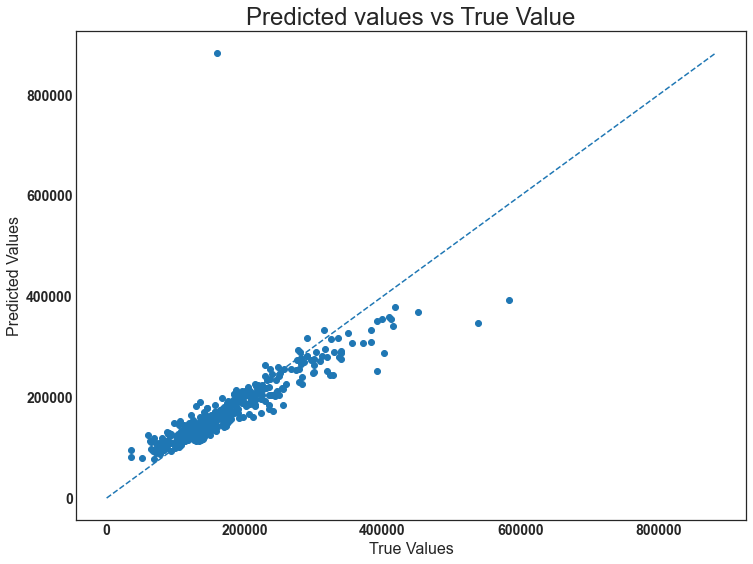

In [256]:
plt.figure(figsize = (12, 9))

# Examine the relationship between observed and predicted values.
plt.scatter(y_test, y_pred_test2**2)

# Line showing perfect predictions.
plt.plot([0, max(max(y_test),max(y_pred_test2**2))],
         [0, max(max(y_test),max(y_pred_test2**2))],
         linestyle = '--')

plt.title('Predicted values vs True Value', fontsize = 24)
plt.xlabel('True Values', fontsize = 16)
plt.ylabel('Predicted Values', fontsize = 16);

1. The model predicted accurately at the lower range of housing value, except for one extreme outlier (Predicted ~ 800k, Actual ~ 200k).  The model prediction under-predict at values higher than \\$ 300,000 of predicted value.

2. The model has over predicted the housing value on  the outlier case. The "outlier" can be truly an outlier (eg: a mistake by data entry into the feature) , or it contains certain feature that lower the price where our model did not capture. However, it is a single occurance, hence we need future dataset to revalidate.

### RMSE without the Outlier

As the single extreme outlier have severely penalized our model, lets find out how would our model would have been performed without the outlier.

In [257]:
intermediate = []
for true, pred in zip(y_test, y_pred_test2**2):
    
    if math.isclose(true, 180_000, abs_tol= 50_000) & math.isclose(pred, 850_000, abs_tol= 50_000):
        print(f"outlier value: ${pred:.0f}")
        continue
    
    nominator = (true - pred)**2
    intermediate.append(nominator)

RMSE = ( sum(intermediate) / len(intermediate) ) ** 0.5
print(f'RMSE without outlier: ${RMSE:.0f}')

outlier value: $882676
RMSE without outlier: $29158


The RMSE without the outlier is approx \\$ 29158 as comapre to earlier \\$ 41312. Hence, in future production, we could inform stake holder that the model can predict at accuracy of $ 29158 if we constrain our predicted value within certain range (predicted value < 300k).

## Model

In [258]:
feature_name_1 = model_1.named_steps.columntransformer.named_transformers_.\
                pipeline.named_steps.getcorrelatedfeature.selected_feature_.\
                index.to_list()

In [259]:
#getting index of passthrough column
index_passthough = model_1.named_steps.columntransformer.transformers_[-1][-1]

#getting feature name that is feed into column transformer
initial_features = model_1.named_steps.agesold.getFeature
feature_name_2 = [ initial_features[index] for index in index_passthough]

# all feature
all_feature = feature_name_1 + feature_name_2

In [260]:
#getting coefficient

coef = model_1.named_steps.lasso.coef_

In [261]:
coefficient_table = pd.DataFrame(coef.reshape(-1, 1), columns = ['Coefficient'], index = all_feature)
coefficient_table.loc[ coefficient_table['Coefficient'] != 0]

Coefficient
Overall Qual    37.894563
Exter Qual      13.112086
Gr Liv Area     24.513240

We can see that overall quality has most influence to predicted price followed by Gr Liv Area & Exter Qual. Our model is as following

$\sqrt{Housing Sale Price} = 37.89 * X_{Overall Qual} + 13.11 * X_{Exter Qual} + 24.5 * X_{Gr Liv Area}$

### Is There a Relationship Between the Response and Predictors?

We have fitted a Linear Regression with _Overall Qual, Exter Qual, Gr Liv Area_ which able to predict the _Housing Price_. However does this happen by chance (is it significant)? We will do a hypothesis testing to answer this question. Where by

$H_{0} = B_{Overall Qual} = B_{Exter Qual} = B_{Gr Liv Area} = 0$

$H_{alt}$ _equals to either one of_ $B_{Overall Qual}, B_{Exter Qual}, B_{Gr Liv Area}$ != 0

We will solve the hypothesis by calculating the F-statistic, where the p-values of the F-statistic < 0.05 for 95% significant level to reject the null hypothesis.

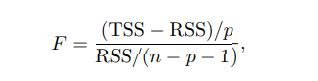

In [262]:
#calculating TSS
y_mean = np.mean(y_test)
TSS = sum([(true - y_mean)**2 for true in y_test])

#calculating RSS
RSS = sum([(true - pred)**2 for true, pred in zip(y_test, y_pred_test2**2)])

#n
n = len(y_test)

#p, number of predictors = 3
p = 3

nom =  (TSS - RSS) / p  
denom = RSS / (n - p - 1)

F = nom / denom
F

254.70131421522635

In [263]:
#from F-statistic to p value
df1 = p - 1
df2 = n - p

p_value = 1 - scipy.stats.f.cdf(F, df1, df2)
p_value

1.1102230246251565e-16

Since p_value < 0.05 we conclude that we reject the null hypothesis. One of the predictors Overall Qual, Exter Qual, Gr Liv Area is associated with Housing Sale price

Since we have conclude that one of the predictors is associated with the housing sale price and the model is valid, next question we should ask is 

**_Do all the predictors in our model help to explain Housing Sale , or is only a subset of the predictors useful?_**

This is an issue of multicolinearity. Multicollinearity will affect the explanability of the model however it does not affect the accuracy of the model.

 Since our problem statement is a prediction problem, hence multicolinearity will not be checked.

## Conclusion

**To answer our problem statement : Based on the Ames Housing Dataset, create a regression model that will predict the price of a house at sale.**
<br> We have created a model which takes inputs of _Overall Qual, Exter Qual & Gr Liv Area_  which predicts a house price with accuracy of +- \\$ 29158 when the prediction outputs value ( < \\$ 300,000), however cautious must be given when the predicted value is above \\$ 300,000. 